In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
ss = pd.read_csv('SampleSubmission.csv')
variables = pd.read_csv('VariableDefinitions.csv')

In [3]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['bank_account'] = le.fit_transform(train['bank_account'])
train['bank_account'].value_counts()

0    20212
1     3312
Name: bank_account, dtype: int64

In [5]:
X = train.drop('bank_account',axis=1)
y = train['bank_account']

In [6]:
from sklearn.preprocessing import MinMaxScaler
def processor(data):
    le = LabelEncoder()
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)
    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             "country"]
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)
    
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
    
    # drop uniquid column
    data = data.drop(["uniqueid"], axis=1)
    
    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    
    return data                  


In [7]:
processed_train = processor(X)
processed_test = processor(test)

In [8]:
from sklearn.model_selection import train_test_split

X_Train, X_Val, y_Train, y_val = train_test_split(processed_train, y, stratify = y, 
                                                  test_size = 0.1, random_state=101)

In [9]:
from sklearn.linear_model import LogisticRegressionCV

In [10]:
log_model = LogisticRegressionCV(class_weight='balanced')

In [11]:
log_model.fit(X_Train,y_Train)

LogisticRegressionCV(Cs=10, class_weight='balanced', cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [12]:
log_model.get_params

<bound method BaseEstimator.get_params of LogisticRegressionCV(Cs=10, class_weight='balanced', cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)>

In [13]:
log_model.coef_

array([[ 7.67297255e-03,  2.62271307e-01,  1.29544541e+00,
        -6.40857111e-02,  3.87799127e-01,  3.40586417e-01,
        -2.45418478e-01,  4.18790572e-01, -6.76911870e-03,
        -1.02682254e-01, -1.89763855e-01,  1.25828553e-01,
        -7.40260009e-02, -9.66686864e-04,  1.71703879e-01,
        -7.08141396e-02, -2.59116325e-02, -1.06091044e+00,
         3.17030482e-02, -7.01693357e-01,  1.42927228e-01,
         9.02340422e-01,  6.85618523e-01, -5.60370164e-03,
        -3.36301643e-01,  4.90240883e-01,  7.63161973e-01,
         1.94647590e-01, -5.74693128e-01, -2.30276350e-01,
         1.50954452e-01, -3.89004835e-01, -6.31398194e-02,
         6.16883382e-01,  1.51978559e-01, -3.19332225e-01,
        -4.49544297e-01]])

In [14]:
y_pred = log_model.predict(X_Val)

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,classification_report

In [17]:
1 - accuracy_score(y_pred,y_val)

0.21164470888227793

In [18]:
confusion_matrix(y_pred,y_val)

array([[1632,  108],
       [ 390,  223]], dtype=int64)

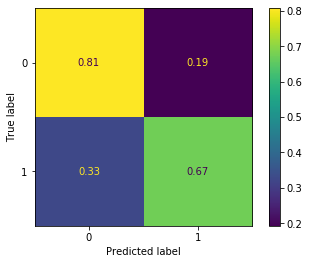

In [20]:
plot_confusion_matrix(log_model,X_Val,y_val,normalize='true')

In [21]:
Y_pred = log_model.predict(processed_test)

In [23]:
submission = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"],
                           "bank_account": Y_pred})

In [26]:
submission.head(5)

,uniqueid,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0


In [28]:
submission.to_csv('second_submission##',index=False)